## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [2]:
# 1. Data Exploration and Preprocessing:

In [4]:
# load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
# load the data set 'adult_with_headers'
df=pd.read_csv('adult_with_headers.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# conduct basic data exploration (summary statistics, missing values, data types)

In [12]:
df.size

488415

In [14]:
df.shape

(32561, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df.describe().round(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [22]:
# there is no null values

In [24]:
# checking the presence of duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [26]:
df[df.duplicated]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [28]:
df[df.duplicated].shape

(24, 15)

In [30]:
# removing duplicates
# Keeps the first occurrence of duplicate and drops subsequent duplicate.

In [32]:
df.drop_duplicates(keep='first')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
# Modifies the original DataFrame in place, so no new DataFrame is created.
# Resets the index of the DataFrame after dropping duplicates, giving a continuous index.

In [36]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
# Apply scaling techniques to numerical features

In [40]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [42]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [44]:
target=df[['income']]

In [46]:
target

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32532,<=50K
32533,>50K
32534,<=50K
32535,<=50K


In [48]:
features = df.drop(columns='income')

In [50]:
features

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
# Create an instance of StandardScaler
scaler = StandardScaler()

In [56]:
# Fit and transform the numerical features in your dataset
df[num_col] = scaler.fit_transform(df[num_col])

In [58]:
df[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


In [60]:
df[num_col].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04
mean,-7.555945e-17,-1.255685e-16,2.849858e-17,3.646945e-17,4.367598e-19,-6.485884e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582777e+00,-1.681551e+00,-3.531590e+00,-1.459754e-01,-2.167432e-01,-3.194403e+00
25%,-7.761933e-01,-6.816726e-01,-4.206787e-01,-1.459754e-01,-2.167432e-01,-3.566374e-02
50%,-1.162616e-01,-1.082361e-01,-3.181473e-02,-1.459754e-01,-2.167432e-01,-3.566374e-02
75%,6.903217e-01,4.472760e-01,7.459132e-01,-1.459754e-01,-2.167432e-01,3.693028e-01
max,3.770003e+00,1.226778e+01,2.301369e+00,1.338964e+01,1.058963e+01,4.742941e+00


In [62]:
# mean of 0 and a standard deviation of 1

In [64]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K


In [66]:
# Standard Scaler will standardize data by removing the mean and scaling to unit variance
#  Standard scaling is most effective for data that is approximately normally distributed, as it centers the data and adjusts for any variation in the spread of values.

In [68]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 

In [70]:
# Fit and transform the numerical features
df[num_col] = scaler.fit_transform(df[num_col])

In [72]:
df[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [74]:
df[num_col].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,0.295692,0.120547,0.605454,0.010785,0.020057,0.402452
std,0.186822,0.071689,0.171442,0.073880,0.092539,0.125989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152611,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [78]:
# MinMax Scaler scales features to the range of [0, 1] 
# It adjusts all values to fall between the minimum and maximum values of each feature.

In [80]:
# 2. Encoding Techniques

In [82]:
from sklearn.preprocessing import LabelEncoder

In [84]:
# Finding the number of unique categories in each categorical column
category_counts = {col: df[col].nunique() for col in cat_col}

In [86]:
category_counts

{'workclass': 9,
 'education': 16,
 'marital_status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'native_country': 42,
 'income': 2}

In [88]:
# Apply One-Hot Encoding to categorical variables with less than 5 categories and 	use Label Encoding for categorical variables with more than 5 categories

In [90]:
# Iterate through each categorical column
for col in cat_col:
    num_unique = df[col].nunique()
    
    # Manually encode binary columns with 0 and 1
    if num_unique == 2:
        df[col] = df[col].apply(lambda x: 1 if x == df[col].unique()[1] else 0)
    
    # Apply One-Hot Encoding if the number of categories is between 2 and 5 (excluding binary columns)
    elif 2 < num_unique < 5:
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)
    
    # Apply Label Encoding if the number of categories is 5 or more
    else:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

In [92]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0,0.021740,0.0,0.397959,39,0
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0,0.000000,0.0,0.122449,39,0
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0,0.000000,0.0,0.397959,39,0
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0,0.000000,0.0,0.397959,39,0
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,1,0.000000,0.0,0.397959,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,4,0.166404,7,0.733333,2,13,5,4,1,0.000000,0.0,0.377551,39,0
32533,0.315068,4,0.096500,11,0.533333,2,7,0,4,0,0.000000,0.0,0.397959,39,1
32534,0.561644,4,0.094827,11,0.533333,6,1,4,4,1,0.000000,0.0,0.397959,39,0
32535,0.068493,4,0.128499,11,0.533333,4,1,3,4,0,0.000000,0.0,0.193878,39,0


In [94]:
# Pros of Ordinal Encoding
## No Ordinal Relationships Assumed: It doesn’t assume any order among categories, which is beneficial for nominal variables (like color, gender), where there’s no natural ranking.
## Good for Models Requiring Numerical Input: Most machine learning models (especially linear models and tree-based models) can handle one-hot encoded data well, as it allows each category to be represented independently.
## Prevents Ordinal Misinterpretation: By creating separate columns, One-Hot Encoding avoids implying any sort of ordinal relationship between categories.

#Cons:
## High-Dimensional Data: If there are many unique categories, One-Hot Encoding can lead to a large number of new columns, causing the curse of dimensionality and increasing computational cost.
## Less Efficient for High Cardinality: For categorical features with many categories (like zip code or city), one-hot encoding can create a huge number of columns, making the model inefficient.
## Sparsity: The resulting data is often sparse (contains many zero values), which can consume significant memory, especially with large datasets.

In [96]:
# Pros of Label Encoding
## Memory Efficient: Label Encoding only adds a single new column, regardless of the number of categories, making it highly efficient in terms of memory and computation.
## Suitable for Ordinal Data: It works well when there’s a meaningful order among categories (like low, medium, high), as it preserves the ordinal relationship.
## Less Computationally Intensive: Compared to One-Hot Encoding, it’s simpler and faster for high-cardinality categorical features since it doesn’t create multiple columns.
# Cons:
# Imposes Ordinal Relationship: Label Encoding inherently implies an order or ranking among categories, which can mislead models if the categorical feature is nominal (has no natural order).
# Can Introduce Bias in Models: Some machine learning models (e.g., linear regression, decision trees) may interpret the encoded values as a ranking or weight, introducing bias when categories should be treated as distinct.
# Less Effective for Non-Ordinal Nominal Features: For features without a meaningful order, Label Encoding can lead to poorer performance, as the model might misinterpret the encoded values.

In [98]:
# 3. Feature Engineering:
 # feature engineering is a process of extracting useful features from raw rata using math, statistics and domain knowledge.

In [100]:
# if employment_type_ratio is taken as a new feature

In [102]:
# Calculate the Employment Type Ratio
df['employment_type_ratio'] = df['capital_gain'] / df['hours_per_week']

In [104]:
df['employment_type_ratio']

0        0.054629
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32532    0.000000
32533    0.000000
32534    0.000000
32535    0.000000
32536    0.377530
Name: employment_type_ratio, Length: 32537, dtype: float64

In [106]:
# Display the first few rows to check the new feature
df[['capital_gain', 'hours_per_week', 'employment_type_ratio']].head()

,capital_gain,hours_per_week,employment_type_ratio
0,0.02174,0.397959,0.054629
1,0.00000,0.122449,0.000000
2,0.00000,0.397959,0.000000
3,0.00000,0.397959,0.000000
4,0.00000,0.397959,0.000000


In [108]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,employment_type_ratio
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0,0.021740,0.0,0.397959,39,0,0.054629
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0,0.000000,0.0,0.122449,39,0,0.000000
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0,0.000000,0.0,0.397959,39,0,0.000000
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0,0.000000,0.0,0.397959,39,0,0.000000
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,1,0.000000,0.0,0.397959,5,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,4,0.166404,7,0.733333,2,13,5,4,1,0.000000,0.0,0.377551,39,0,0.000000
32533,0.315068,4,0.096500,11,0.533333,2,7,0,4,0,0.000000,0.0,0.397959,39,1,0.000000
32534,0.561644,4,0.094827,11,0.533333,6,1,4,4,1,0.000000,0.0,0.397959,39,0,0.000000
32535,0.068493,4,0.128499,11,0.533333,4,1,3,4,0,0.000000,0.0,0.193878,39,0,0.000000


In [110]:
# Ratio of capital_gain to hours_per_week, to capture potential earnings efficiency per hour.
# This ratio can reveal high earners or those who gain more capital compared to their working hours, which could help in predicting higher income categories.

In [112]:
# if seniority_indicator is taken as a new feature.

In [114]:
# Mark an individual as "Senior" (1) if their education_num is above a certain threshold as 10 and their age is above 40. Otherwise, mark them as "Non-Senior" (0).

In [116]:
# Define Seniority Indicator based on education and age thresholds
df['seniority_indicator'] = df.apply(lambda x: 1 if x['education_num'] > 0.80  or x['age'] > 0.35 else 0, axis=1)

In [118]:
df['seniority_indicator']

0        0
1        1
2        0
3        1
4        0
        ..
32532    0
32533    0
32534    1
32535    0
32536    1
Name: seniority_indicator, Length: 32537, dtype: int64

In [120]:
seniority_counts = df['seniority_indicator'].value_counts()
seniority_counts

0    19463
1    13074
Name: seniority_indicator, dtype: int64

In [122]:
seniority_percentage = df['seniority_indicator'].value_counts(normalize=True) * 100
seniority_percentage

0    59.818053
1    40.181947
Name: seniority_indicator, dtype: float64

In [124]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,employment_type_ratio,seniority_indicator
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0,0.021740,0.0,0.397959,39,0,0.054629,0
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0,0.000000,0.0,0.122449,39,0,0.000000,1
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0,0.000000,0.0,0.397959,39,0,0.000000,0
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0,0.000000,0.0,0.397959,39,0,0.000000,1
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,1,0.000000,0.0,0.397959,5,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,4,0.166404,7,0.733333,2,13,5,4,1,0.000000,0.0,0.377551,39,0,0.000000,0
32533,0.315068,4,0.096500,11,0.533333,2,7,0,4,0,0.000000,0.0,0.397959,39,1,0.000000,0
32534,0.561644,4,0.094827,11,0.533333,6,1,4,4,1,0.000000,0.0,0.397959,39,0,0.000000,1
32535,0.068493,4,0.128499,11,0.533333,4,1,3,4,0,0.000000,0.0,0.193878,39,0,0.000000,0


In [126]:
#  those with high education levels and older age could be marked as "Senior" employees.
#  This could help identify individuals who might have higher income due to experience and education level.

In [128]:
# Histogram

In [130]:
# Check for inf values
print(df.isin([np.inf, -np.inf]).sum())

age                      0
workclass                0
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation               0
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country           0
income                   0
employment_type_ratio    2
seniority_indicator      0
dtype: int64


In [132]:
# Replace inf with a large number 
df.replace([np.inf, -np.inf], 1e6, inplace=True)

In [134]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,employment_type_ratio,seniority_indicator
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0,0.021740,0.0,0.397959,39,0,0.054629,0
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0,0.000000,0.0,0.122449,39,0,0.000000,1
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0,0.000000,0.0,0.397959,39,0,0.000000,0
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0,0.000000,0.0,0.397959,39,0,0.000000,1
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,1,0.000000,0.0,0.397959,5,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,4,0.166404,7,0.733333,2,13,5,4,1,0.000000,0.0,0.377551,39,0,0.000000,0
32533,0.315068,4,0.096500,11,0.533333,2,7,0,4,0,0.000000,0.0,0.397959,39,1,0.000000,0
32534,0.561644,4,0.094827,11,0.533333,6,1,4,4,1,0.000000,0.0,0.397959,39,0,0.000000,1
32535,0.068493,4,0.128499,11,0.533333,4,1,3,4,0,0.000000,0.0,0.193878,39,0,0.000000,0


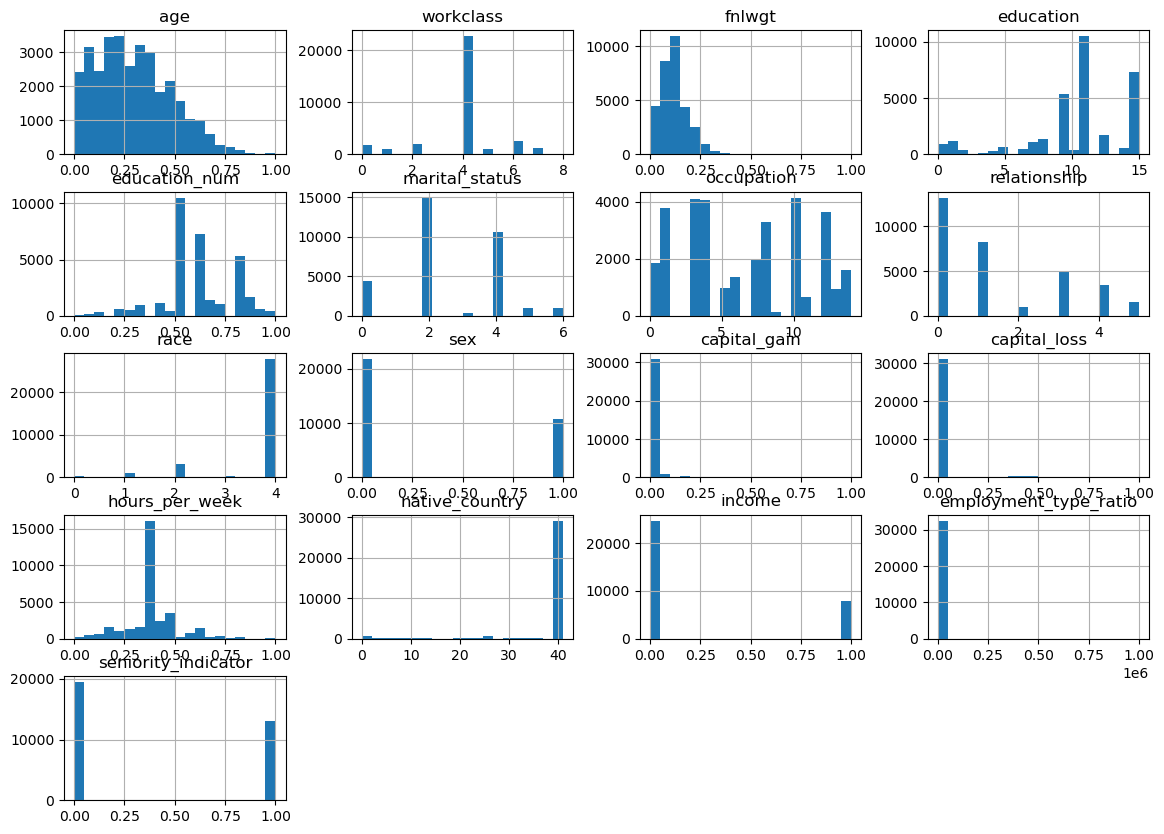

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [136]:
df.hist(bins=20,figsize=(14,10))
plt.show()
plt.tight_layout

In [138]:
# age is a right-skewed numerical feature
# for clear visualization,

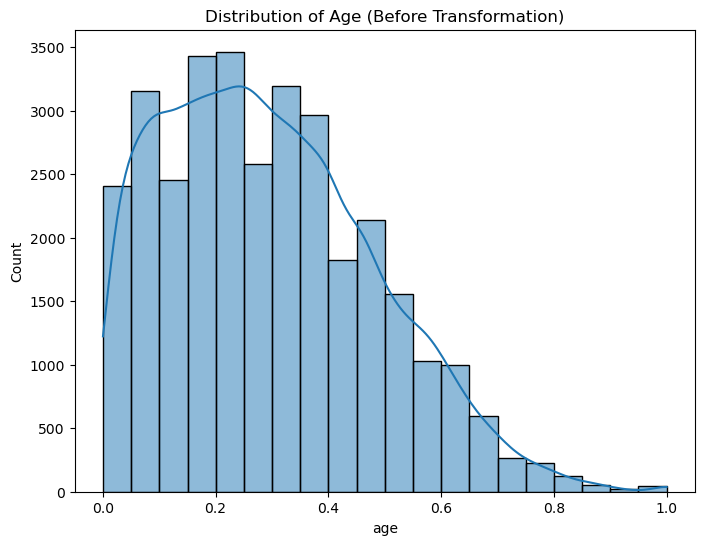

In [140]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age (Before Transformation)')
plt.show()

In [142]:
# Apply Log Transformation: To reduce right skewness, apply the log transformation. 
# Add 1 to avoid taking the log of zero in case there are any zero values.

In [144]:
# Apply log transformation
df['age_log'] = np.log(df['age'] + 1)
df['age_log']

0        0.263417
1        0.372980
2        0.252835
3        0.400888
4        0.140357
           ...   
32532    0.128381
32533    0.273889
32534    0.445739
32535    0.066249
32536    0.391672
Name: age_log, Length: 32537, dtype: float64

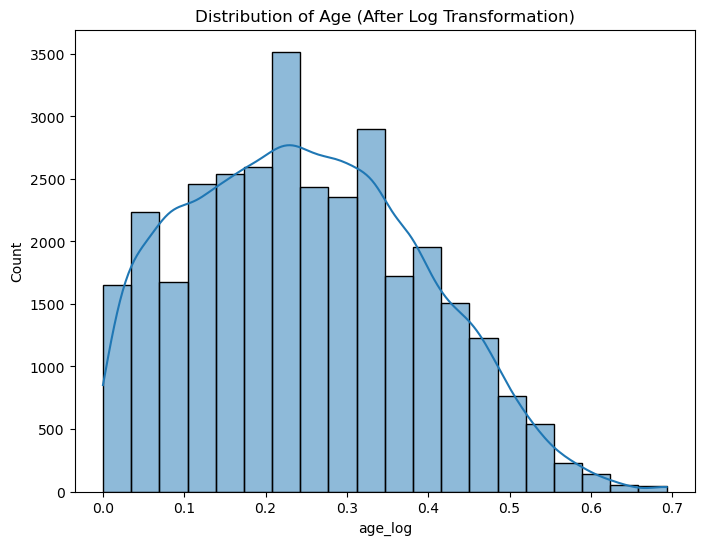

In [146]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age_log'], bins=20, kde=True)
plt.title('Distribution of Age (After Log Transformation)')
plt.show()

In [148]:
from scipy.stats import skew

In [150]:
# Calculate skewness for 'age'
age_skewness = skew(df['age'].dropna())
print("Skewness of age:", age_skewness)

Skewness of age: 0.5576374421375199


In [152]:
# Calculate skewness for 'fnlwgt'
fnlwgt_skewness = skew(df['fnlwgt'].dropna())
print("Skewness of fnlwgt:", fnlwgt_skewness)

Skewness of fnlwgt: 1.447636166419673


In [154]:
# A skewness coefficient close to 0 indicates a symmetric distribution, while:

# A positive value indicates right skew (long tail on the right).
# A negative value indicates left skew (long tail on the left).

In [156]:
# Calculate skewness for 'capital_gain'
capital_gain_skewness = skew(df['capital_gain'].dropna())
print("Skewness of capital_gain:", capital_gain_skewness)

Skewness of capital_gain: 11.948851942756665


In [158]:
# Calculate skewness for 'capital_loss'
capital_loss_skewness = skew(df['capital_loss'].dropna())
print("Skewness of capital_loss:", capital_loss_skewness)

Skewness of capital_loss: 4.592490690725554


In [160]:
# Calculate skewness for 'hours_per_week'
hrsperweek_skewness = skew(df['hours_per_week'].dropna())
print("Skewness of hours_per_week:", hrsperweek_skewness)

Skewness of hours_per_week: 0.2287483316217172


In [162]:
# Age (0.56) is moderately skewed,
#Based on these values, a log transformation is most appropriate for features with high skewness, particularly capital_gain and capital_loss.
# so, 

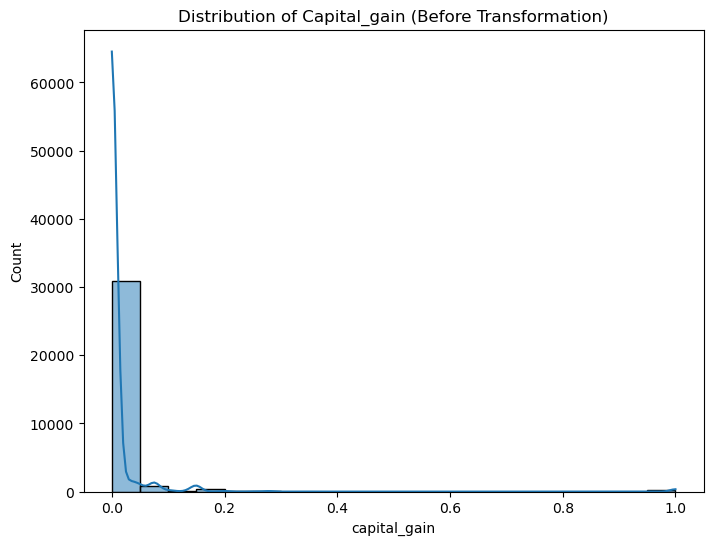

In [164]:
# Visualization Before Transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['capital_gain'], bins=20, kde=True)
plt.title('Distribution of Capital_gain (Before Transformation)')
plt.show()

In [166]:
# applying log transformation
df['capital_gain_log'] = np.log(df['capital_gain'] + 1)
df['capital_gain_log']

0        0.021507
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32532    0.000000
32533    0.000000
32534    0.000000
32535    0.000000
32536    0.139972
Name: capital_gain_log, Length: 32537, dtype: float64

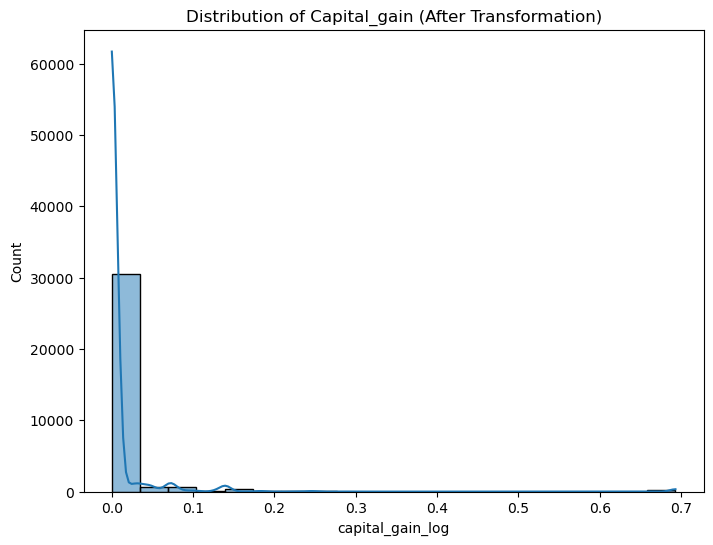

In [168]:
# Visualization After Transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['capital_gain_log'], bins=20, kde=True)
plt.title('Distribution of Capital_gain (After Transformation)')
plt.show()

In [170]:
# 4. Feature Selection:
 # Feature selection is a crucial step in preparing data for machine learning. 
 # It involves selecting only the most relevant features to improve model performance, reduce overfitting, and decrease computation time. 

In [172]:
# Fit the Isolation Forest model

In [174]:
from sklearn.ensemble import IsolationForest

In [176]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
from sklearn.impute import SimpleImputer

In [180]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [182]:
# Apply Isolation Forest on the imputed data
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_imputed['anomaly_score'] = iso_forest.fit_predict(df_imputed)

In [183]:
# Remove outliers
df_imputed = df_imputed[df_imputed['anomaly_score'] == 1].drop(columns=['anomaly_score'])

In [186]:
df_imputed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,employment_type_ratio,seniority_indicator,age_log,capital_gain_log
0,0.301370,7.0,0.044302,9.0,0.800000,4.0,1.0,1.0,4.0,0.0,0.02174,0.0,0.397959,39.0,0.0,0.054629,0.0,0.263417,0.021507
1,0.452055,6.0,0.048238,9.0,0.800000,2.0,4.0,0.0,4.0,0.0,0.00000,0.0,0.122449,39.0,0.0,0.000000,1.0,0.372980,0.000000
2,0.287671,4.0,0.138113,11.0,0.533333,0.0,6.0,1.0,4.0,0.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,0.0,0.252835,0.000000
3,0.493151,4.0,0.151068,1.0,0.400000,2.0,6.0,0.0,2.0,0.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,1.0,0.400888,0.000000
4,0.150685,4.0,0.221488,9.0,0.800000,2.0,10.0,5.0,2.0,1.0,0.00000,0.0,0.397959,5.0,0.0,0.000000,0.0,0.140357,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,0.068493,4.0,0.202298,15.0,0.600000,4.0,11.0,1.0,4.0,0.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,0.0,0.066249,0.000000
32532,0.136986,4.0,0.166404,7.0,0.733333,2.0,13.0,5.0,4.0,1.0,0.00000,0.0,0.377551,39.0,0.0,0.000000,0.0,0.128381,0.000000
32533,0.315068,4.0,0.096500,11.0,0.533333,2.0,7.0,0.0,4.0,0.0,0.00000,0.0,0.397959,39.0,1.0,0.000000,0.0,0.273889,0.000000
32534,0.561644,4.0,0.094827,11.0,0.533333,6.0,1.0,4.0,4.0,1.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,1.0,0.445739,0.000000


In [188]:
df_imputed.shape

(30910, 19)

In [190]:
df_imputed = df_imputed.reset_index(drop=True)

In [192]:
df_imputed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,employment_type_ratio,seniority_indicator,age_log,capital_gain_log
0,0.301370,7.0,0.044302,9.0,0.800000,4.0,1.0,1.0,4.0,0.0,0.02174,0.0,0.397959,39.0,0.0,0.054629,0.0,0.263417,0.021507
1,0.452055,6.0,0.048238,9.0,0.800000,2.0,4.0,0.0,4.0,0.0,0.00000,0.0,0.122449,39.0,0.0,0.000000,1.0,0.372980,0.000000
2,0.287671,4.0,0.138113,11.0,0.533333,0.0,6.0,1.0,4.0,0.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,0.0,0.252835,0.000000
3,0.493151,4.0,0.151068,1.0,0.400000,2.0,6.0,0.0,2.0,0.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,1.0,0.400888,0.000000
4,0.150685,4.0,0.221488,9.0,0.800000,2.0,10.0,5.0,2.0,1.0,0.00000,0.0,0.397959,5.0,0.0,0.000000,0.0,0.140357,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30905,0.068493,4.0,0.202298,15.0,0.600000,4.0,11.0,1.0,4.0,0.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,0.0,0.066249,0.000000
30906,0.136986,4.0,0.166404,7.0,0.733333,2.0,13.0,5.0,4.0,1.0,0.00000,0.0,0.377551,39.0,0.0,0.000000,0.0,0.128381,0.000000
30907,0.315068,4.0,0.096500,11.0,0.533333,2.0,7.0,0.0,4.0,0.0,0.00000,0.0,0.397959,39.0,1.0,0.000000,0.0,0.273889,0.000000
30908,0.561644,4.0,0.094827,11.0,0.533333,6.0,1.0,4.0,4.0,1.0,0.00000,0.0,0.397959,39.0,0.0,0.000000,1.0,0.445739,0.000000


In [194]:
# Impact of Outliers on Model Performance
  # Outliers can significantly impact machine learning models, especially those sensitive to the distribution of data,

## Distorted Patterns: Outliers can distort the relationships between features, leading models to learn incorrect or misleading patterns, which reduces accuracy and interpretability.

## Increased Error Rates: Models like linear regression or k-nearest neighbors are particularly sensitive to outliers, as they rely on distances or errors that can be skewed by extreme values.

## Bias in Parameter Estimation: In statistical models, outliers can influence estimated parameters (like mean and standard deviation), resulting in biased estimates that don't represent the majority of the data.

## Reduced Model Generalization: When a model overfits to outliers, it may perform poorly on new, unseen data, reducing generalizability.

In [196]:
# Apply PPS

In [198]:
import pandas

In [200]:
import ppscore as pps

In [206]:
# Computes PPS for all pairs of features
pps_matrix = pps.matrix(df)  # Computes PPS for all pairs of features
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.739200,0.886143,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,0.051437,0.052448,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.719600,2.728949,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,0.124347,0.127124,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
356,capital_gain_log,income,0.000000,regression,True,mean absolute error,0.247400,0.303063,DecisionTreeRegressor()
357,capital_gain_log,employment_type_ratio,0.738016,regression,True,mean absolute error,0.026837,0.007031,DecisionTreeRegressor()
358,capital_gain_log,seniority_indicator,0.000000,regression,True,mean absolute error,0.400200,0.468932,DecisionTreeRegressor()
359,capital_gain_log,age_log,0.015135,regression,True,mean absolute error,0.116488,0.114724,DecisionTreeRegressor()


In [216]:
high_ppscore = pps_matrix[pps_matrix['ppscore'] > 0.5]
high_ppscore

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
16,age,seniority_indicator,0.821353,regression,True,mean absolute error,0.400200,7.149435e-02,DecisionTreeRegressor()
17,age,age_log,0.999962,regression,True,mean absolute error,0.116488,4.418041e-06,DecisionTreeRegressor()
20,workclass,workclass,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
40,fnlwgt,fnlwgt,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
60,education,education,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
61,education,education_num,1.000000,regression,True,mean absolute error,0.124347,5.146583e-15,DecisionTreeRegressor()
79,education_num,education,1.000000,regression,True,mean absolute error,2.719600,0.000000e+00,DecisionTreeRegressor()
80,education_num,education_num,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
100,marital_status,marital_status,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None


In [218]:
correlation_matrix = df.corr()

In [222]:
correlation_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,employment_type_ratio,seniority_indicator,age_log,capital_gain_log
age,1.000000,0.003783,-0.076447,-0.010551,0.036224,-0.266137,-0.020911,-0.263744,0.029116,-0.088708,0.077676,0.057745,0.068515,-0.001524,0.234037,0.016653,0.788371,0.996617,0.087925
workclass,0.003783,1.000000,-0.016601,0.023456,0.052169,-0.064761,0.254993,-0.090433,0.049740,-0.095999,0.033852,0.012240,0.139047,-0.007677,0.051665,-0.007383,0.015288,0.014809,0.035274
fnlwgt,-0.076447,-0.016601,1.000000,-0.028053,-0.043388,0.028123,0.001403,0.008868,-0.021497,-0.027089,0.000429,-0.010260,-0.018898,-0.051874,-0.009502,0.003396,-0.066201,-0.076158,-0.000095
education,-0.010551,0.023456,-0.028053,1.000000,0.359085,-0.038422,-0.021235,-0.011057,0.014303,0.027433,0.030085,0.016793,0.055991,0.063870,0.079366,0.000409,0.023057,-0.002979,0.031773
education_num,0.036224,0.052169,-0.043388,0.359085,1.000000,-0.069161,0.109753,-0.094432,0.032011,-0.012205,0.122664,0.079892,0.148422,0.050136,0.335272,-0.007872,0.143129,0.051239,0.133908
marital_status,-0.266137,-0.064761,0.028123,-0.038422,-0.069161,1.000000,-0.009814,0.185532,-0.067930,0.129402,-0.043368,-0.034140,-0.190432,-0.023406,-0.199199,0.002025,-0.207043,-0.292237,-0.048620
occupation,-0.020911,0.254993,0.001403,-0.021235,0.109753,-0.009814,1.000000,-0.075587,0.006794,-0.080501,0.025506,0.017985,0.080501,-0.012406,0.075419,-0.008485,0.017734,-0.015169,0.026755
relationship,-0.263744,-0.090433,0.008868,-0.011057,-0.094432,0.185532,-0.075587,1.000000,-0.116051,0.582594,-0.057947,-0.061098,-0.248875,-0.005636,-0.250948,-0.004619,-0.205267,-0.273711,-0.064017
race,0.029116,0.049740,-0.021497,0.014303,0.032011,-0.067930,0.006794,-0.116051,1.000000,-0.087472,0.011154,0.018913,0.041920,0.137850,0.071847,0.003087,0.027472,0.026468,0.013315
sex,-0.088708,-0.095999,-0.027089,0.027433,-0.012205,0.129402,-0.080501,0.582594,-0.087472,1.000000,-0.048489,-0.045571,-0.229187,0.008256,-0.215969,-0.005513,-0.063474,-0.095414,-0.053867


In [224]:
correlation_matrix.shape

(19, 19)

In [226]:
# Correlation only detects linear relationships between features, while PPS can detect both linear and non-linear relationships.
# Therefore, features with a low correlation score might still have a strong predictive relationship if there’s a non-linear pattern.
# PPS is more general and can capture the predictive power between all types of features, whereas correlation is limited to numeric features.

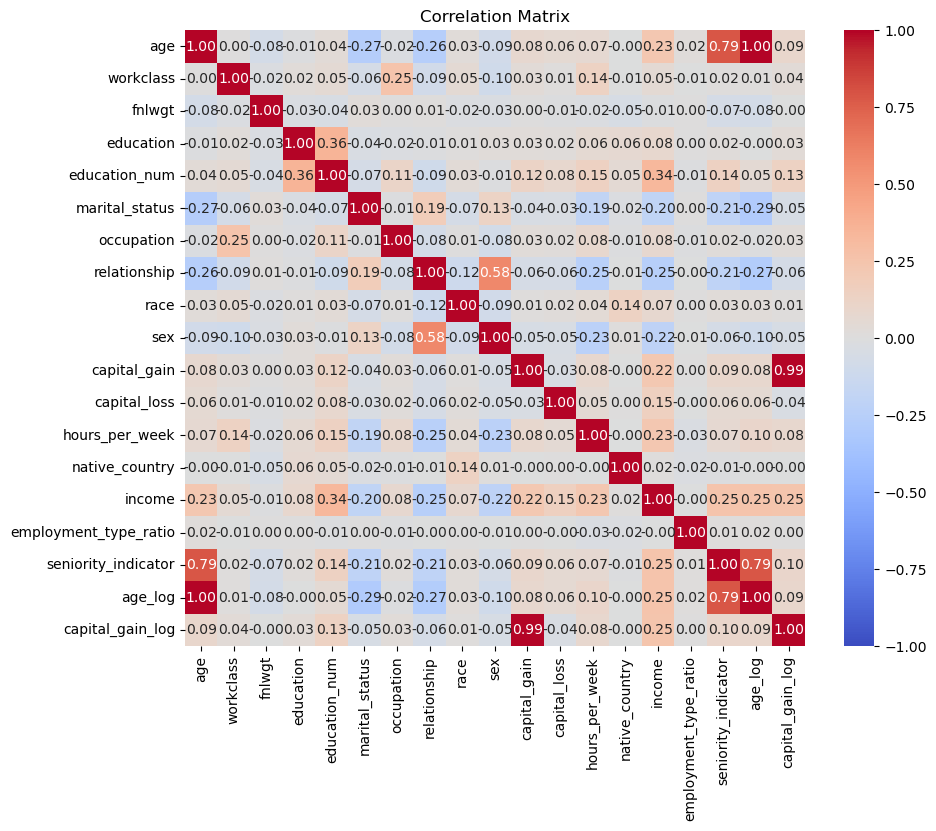

In [228]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

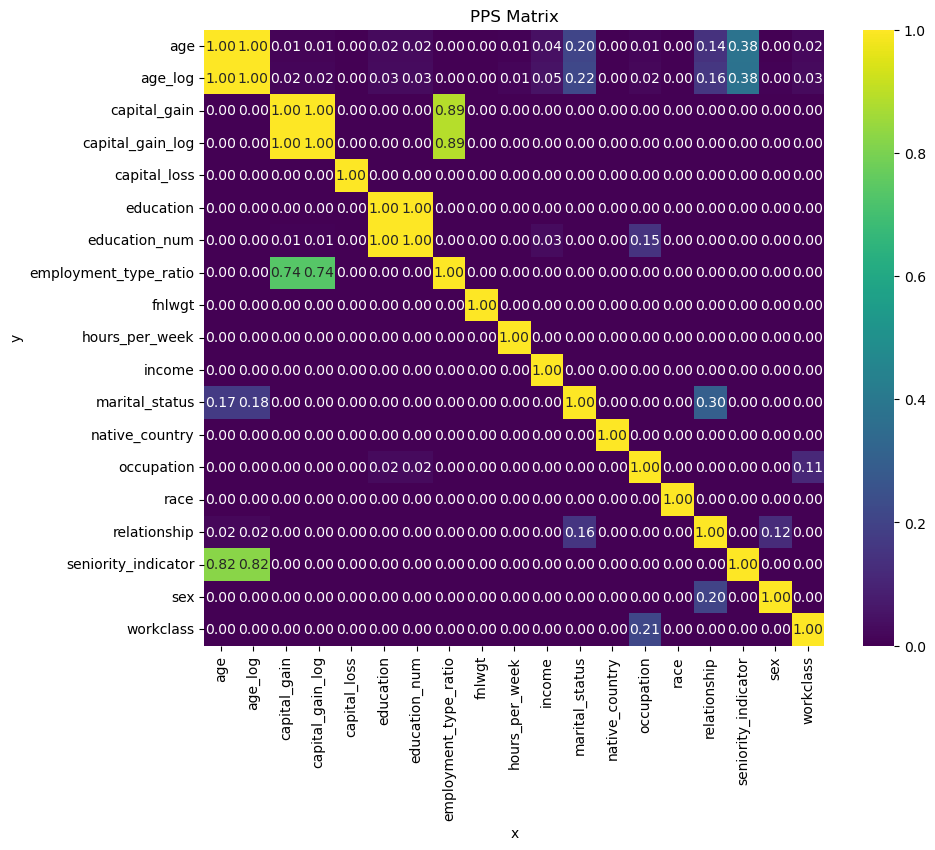

In [230]:
# Plot the PPS matrix as a heatmap
pps_matrix = pps.matrix(df).pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("PPS Matrix")
plt.show()